# Homework 1: Question 2

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

?smf.logit

In [2]:
data_test = pd.read_csv("framingham_test.csv")
data_test.info()
data_test.head()
data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1098 non-null   int64  
 1   age              1098 non-null   int64  
 2   education        1098 non-null   object 
 3   currentSmoker    1098 non-null   int64  
 4   cigsPerDay       1098 non-null   int64  
 5   BPMeds           1098 non-null   int64  
 6   prevalentStroke  1098 non-null   int64  
 7   prevalentHyp     1098 non-null   int64  
 8   diabetes         1098 non-null   int64  
 9   totChol          1098 non-null   int64  
 10  sysBP            1098 non-null   float64
 11  diaBP            1098 non-null   float64
 12  BMI              1098 non-null   float64
 13  heartRate        1098 non-null   int64  
 14  glucose          1098 non-null   int64  
 15  TenYearCHD       1098 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 137.4+ KB


(1098, 16)

In [3]:
data_train = pd.read_csv("framingham_train.csv")
data_train.info()
data_train.head()
data_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


(2560, 16)

In [4]:
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = data_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.1331
Time:                        17:41:40   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

# a)

i) The fitted logistic regression model is y = P(TenYearCHD = 1|X) = 1/(1+exp-(-9.2740 -0.1053*education[T.High school/GED] + -0.1025*education[T.Some college/vocational school] + 0.0610*education[T.Some high school] + 0.5621*male + 0.0689*age + 0.1539*currentSmoker + 0.0155*cigsPerDay + 0.1528*BPMeds + 0.8209*prevalentStroke + 0.2075*prevalentHyp + -0.2975*diabetes + 0.0020*totChol + 0.0181*sysBP + -0.0045*diaBP + 0.0136*BMI + -0.0046*heartRate + 0.0096*glucose)).

ii) Most important risk factor are the small p-values. Variables such as men, age, cigsPerDay, sysBP, and glucose would fall under the important risk factors, especially since their p-value is lower the 0.05 (a small signicance level). For age (as it increases), e^0.0689, which will the number of the increased chance of developing CHD within 10 years.

iii)

In [5]:
# 1. Predicting the probability of default
y_prob = logreg.predict(data_test)

# 2. Determining the optimal threshold of the default probability
## prescribe medicine = 775000 and no medicine costs = 75000
## 775000 (p * 0.15) + 75000 (1 - p*0.15) = 700000(p) -> p = 15/119 (Slides 47-48, Lecture 7).
## The threshold of high CHD-risk and low CHD-risk is 15/119.
## If p > 15/119, then we consider high CHD-risk.

# 3. Predicting the label
y_pred = pd.Series([1 if x > 15/119 else 0 for x in y_prob], index=y_prob.index)

In [6]:
from sklearn.metrics import confusion_matrix
y_test = data_test['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 
# Note that this confusion matrix is slightly different from the results presented in Lecture 7 slides. Those numbers
# were generated by the R program in the previous semester, which had a different random.seed and therefore a different
# train test split.

Confusion Matrix : 
 [[569 354]
 [ 56 119]]


iv) 

In [7]:
TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]

In [8]:
#percent ratio of correctly classified
accuracy = (TP + TN)/(TP + FP + FN + TN)
accuracy

0.6265938069216758

In [9]:
#percent ratio of actual positive that are one correctly predicted "positive"
#true positive divided by all positives
sensitivity_TPR = TP/(TP+FN)
sensitivity_TPR

0.6164680390032503

In [10]:
#percent ratio of actual negatives that are incorrectly labelled "positive"
#true negatives divided by all negatives
fallout_FPR = FP/(FP+TN)
fallout_FPR

0.32

v) 

In [11]:
#not effected by treatment decision, economic cost
total_patients = TP+TN+FP+FN
cost_per_patient = (775000*TP + 75000*FP + 700000*FN)/total_patients
cost_per_patient

631124.7723132969

In [12]:
#treatment decision impacts a patient’s risk of developing CHD
cost_per_patient1 = (775000*TP + 670000*FP + 105000*FN)/total_patients
cost_per_patient1

469640.25500910747

These numbers seem too low of a cost. Based on the decision tree, it seems like this estimate for economic cost is too low since if the patient wasn't perscribed anything at all, they should be paying &0-700k. This could be due to the test data having less data by more than half (test set has ~2500 while training data has only ~1000). The difference in abundance could be a reason that the number is so off from the 700k that would be feed 

vi)

In [13]:
chd_neg = np.sum(data_train['TenYearCHD'] == 0)  # not default 
chd_pos = np.sum(data_train['TenYearCHD'] == 1)   # default

print(pd.Series({'0': chd_neg, '1': chd_pos}))

0    2178
1     382
dtype: int64


In [14]:
#percent ratio of correctly classified
neg_test = np.sum(data_test["TenYearCHD"] == 0)
pos_test = np.sum(data_test["TenYearCHD"] == 1)
ACC = neg_test/(neg_test+pos_test) 
ACC

0.8406193078324226

In [15]:
#percent ratio of actual positives that are correctly labelled "positive"
TPR = 0/pos_test
TPR

0.0

In [16]:
#percent ratio of actual negatives that are incorrectly labelled "positive"
FPR = 0/neg_test
FPR

0.0

In [17]:
cost_per_patient = (FN*700000)/total_patients
cost_per_patient

225683.06010928962

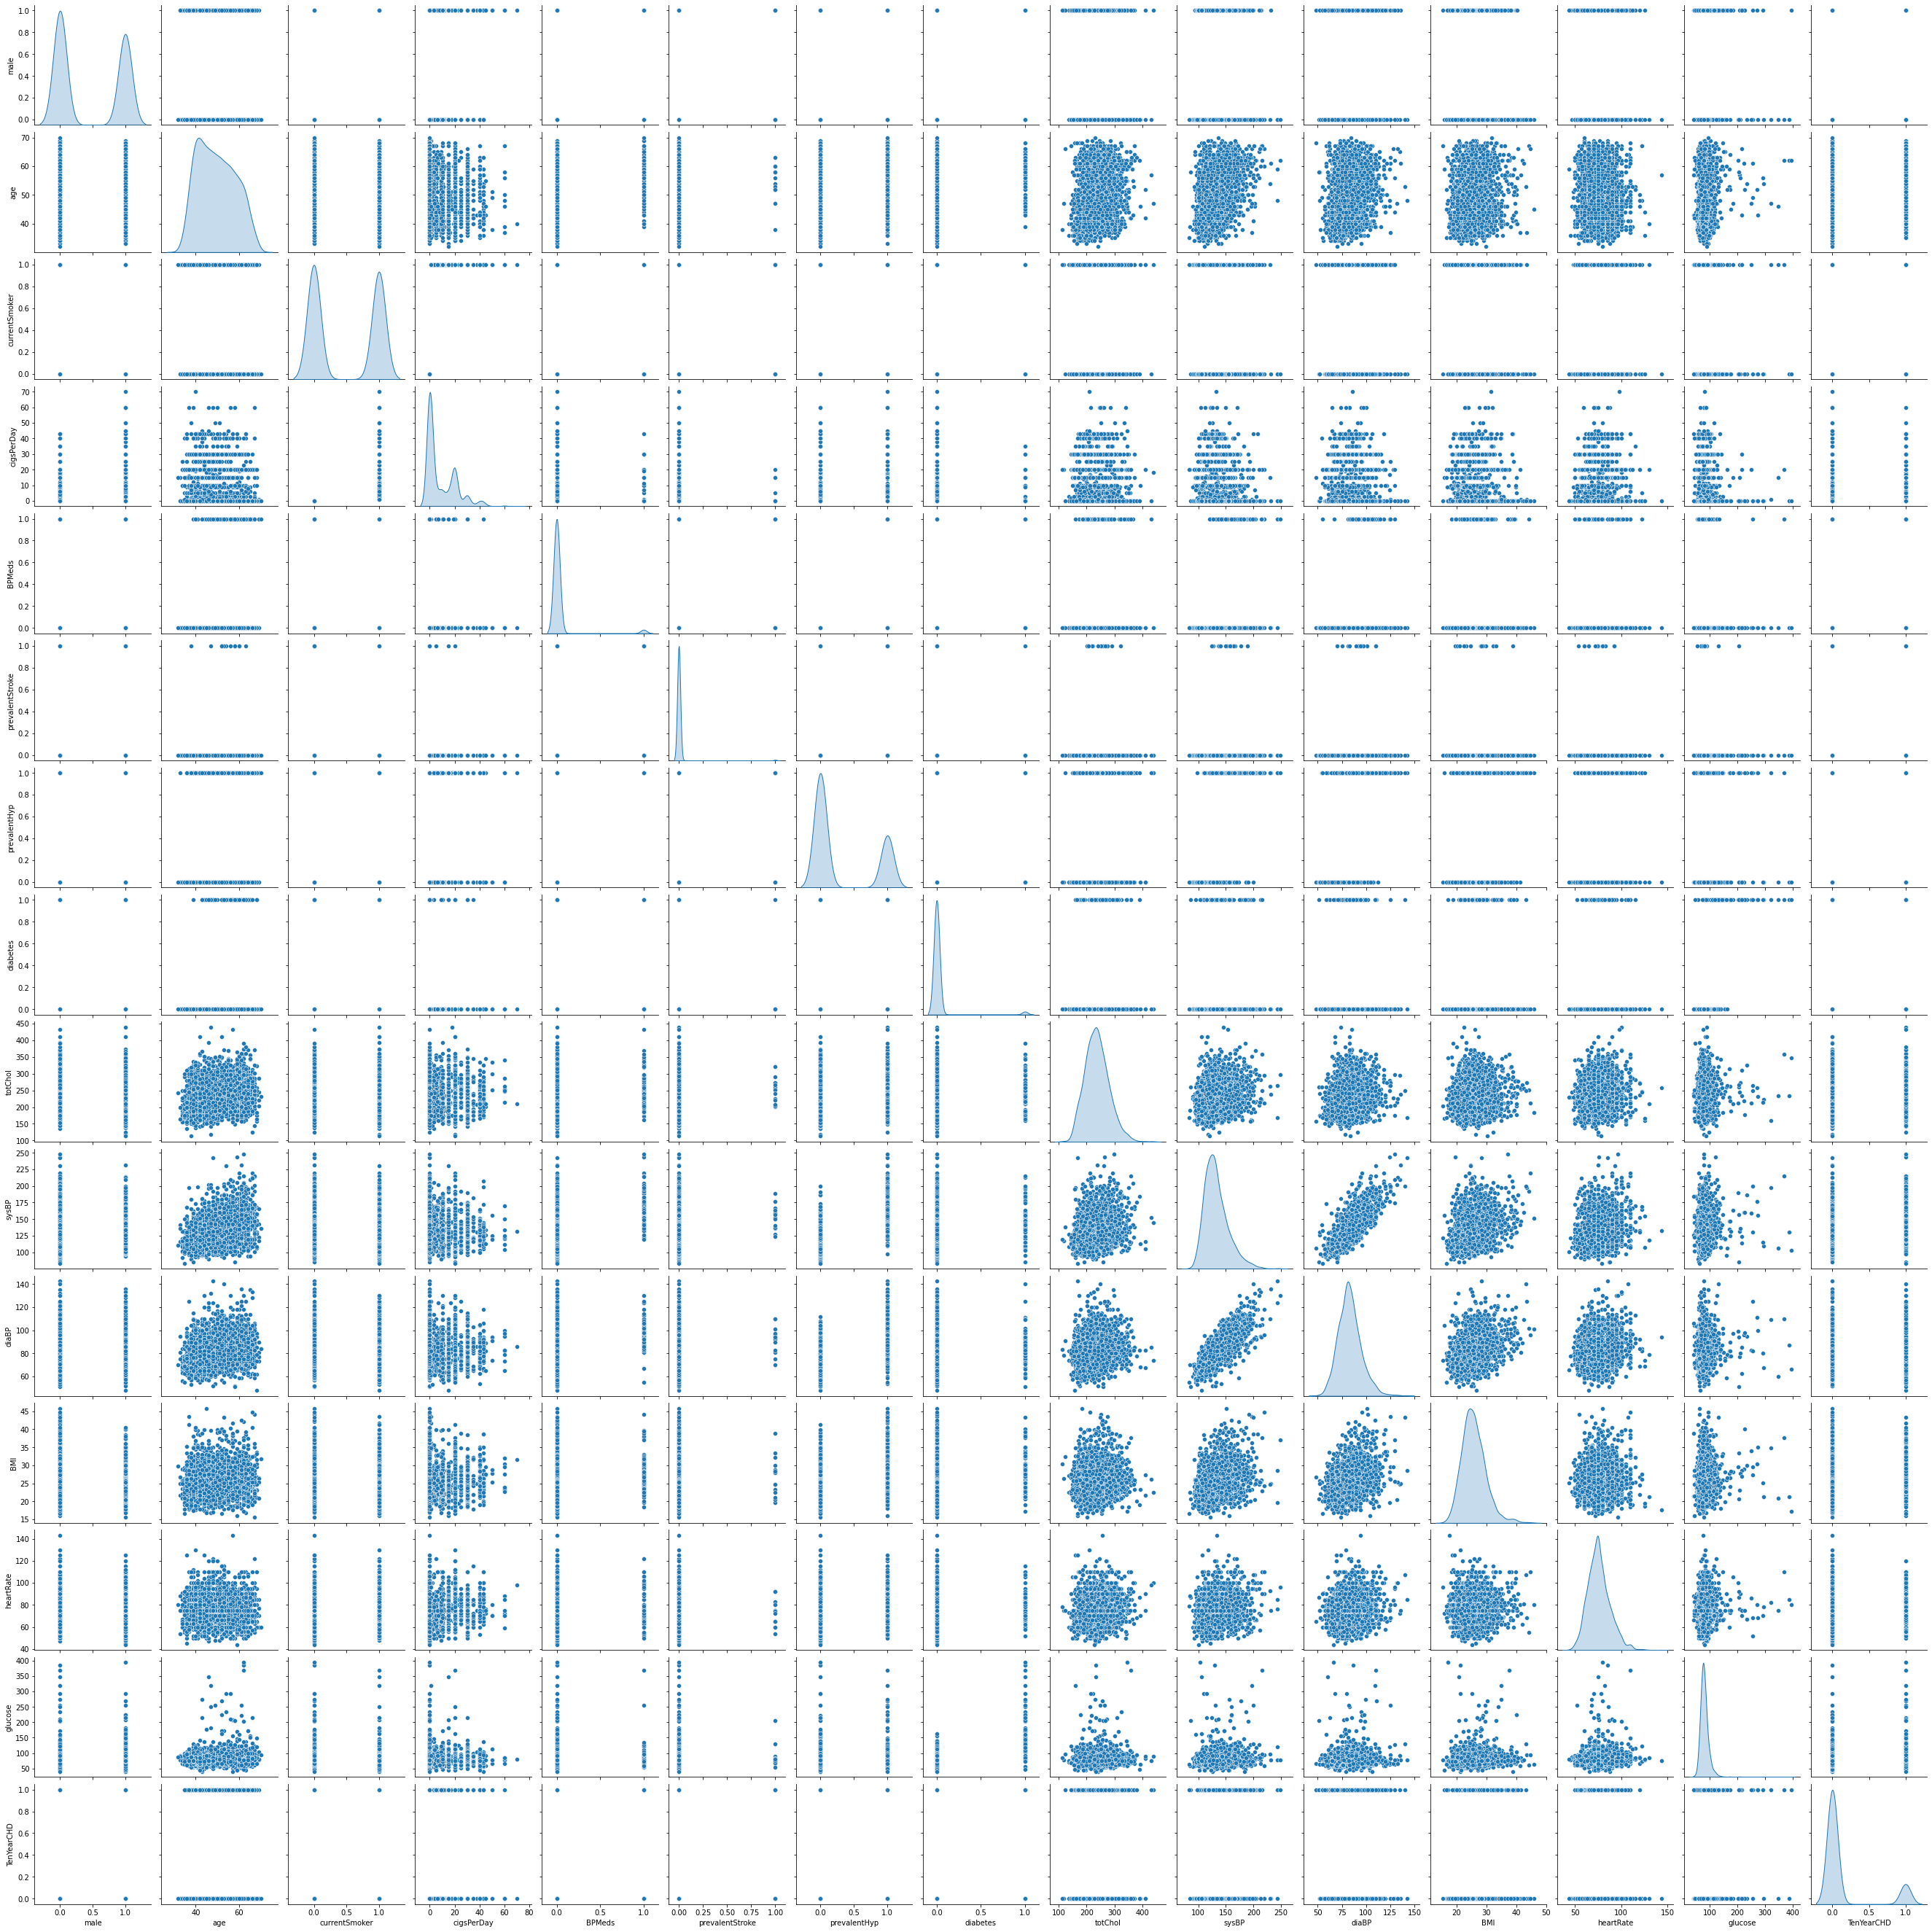

In [18]:
#use seaborn.pairplot to plot scatter plot for continuous variables
import seaborn as sns
sns.pairplot(data_train,diag_kind='kde')

In [19]:
data_train.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029909,0.204207,0.327397,-0.041037,-0.006701,-0.005309,0.018548,-0.076278,-0.046821,0.056319,0.094351,-0.127251,-0.005773,0.087473
age,-0.029909,1.000000,-0.212590,-0.189122,0.136687,0.046245,0.302459,0.123349,0.265056,0.388899,0.208740,0.130222,-0.014015,0.122493,0.249548
currentSmoker,0.204207,-0.212590,1.000000,0.769880,-0.069135,-0.043744,-0.093215,-0.054224,-0.056851,-0.123977,-0.105782,-0.154004,0.063123,-0.056205,0.014960
cigsPerDay,0.327397,-0.189122,0.769880,1.000000,-0.057161,-0.040217,-0.062643,-0.049984,-0.028286,-0.097569,-0.051435,-0.079980,0.070557,-0.065092,0.042388
BPMeds,-0.041037,0.136687,-0.069135,-0.057161,1.000000,0.134277,0.264434,0.056487,0.081220,0.280192,0.196694,0.086536,0.008832,0.037385,0.096434
prevalentStroke,-0.006701,0.046245,-0.043744,-0.040217,0.134277,1.000000,0.069614,0.019806,0.016979,0.071750,0.058465,0.022100,-0.014379,0.020678,0.054035
prevalentHyp,-0.005309,0.302459,-0.093215,-0.062643,0.264434,0.069614,1.000000,0.076278,0.140809,0.695793,0.607500,0.292661,0.148294,0.073367,0.190281
diabetes,0.018548,0.123349,-0.054224,-0.049984,0.056487,0.019806,0.076278,1.000000,0.037066,0.101584,0.048151,0.106759,0.054499,0.614267,0.090978
totChol,-0.076278,0.265056,-0.056851,-0.028286,0.081220,0.016979,0.140809,0.037066,1.000000,0.206660,0.169206,0.119180,0.104704,0.049336,0.085381
sysBP,-0.046821,0.388899,-0.123977,-0.097569,0.280192,0.071750,0.695793,0.101584,0.206660,1.000000,0.783140,0.307599,0.177102,0.119062,0.239592


In [20]:
accuracy = chd_neg/(chd_neg + chd_pos)
accuracy

0.85078125

vii)

In [21]:
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = data_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.1331
Time:                        17:42:35   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Female, age 45, college education, currently a smoker with an average of9 cigarettes per day. Currently on blood pressure medication, has had strokebut not hypertensive. Currently diagnosed with diabetes; total Cholesterolat 220. Systolic/diastolic blood pressure at 140/100, BMI at 33, heart rateat 69, glucose level at 74.

In [22]:
# Example of prediction for a new observation

new_obs = pd.DataFrame(data = {'male' : [0], 'age': [45], 'education' : ['College'], 'currentSmoker' : [1],
                               'cigsPerDay' : [9], 'BPMeds' : [1], 'prevalentStroke' : [1],
                               'prevalentHyp' : [0], 'diabetes' : [1], 'totChol' : [220],
                               'sysBP' : [140], 'diaBP': [100], 'BMI' : [33], 'heartRate' : [69],
                               'glucose' : [74]})

logreg.predict(new_obs)  # probability of default (not paying the loan)

0    0.137213
dtype: float64

Based on the calculations from iii, p = 15/119 = ~0.126 and due to the probability being higher in this case (0.137213), we would give/prescribe the patient medication. 

# b)

In [23]:
y_train = data_train['TenYearCHD']
X_train = data_train.drop(['TenYearCHD'], axis=1)

y_test = data_test['TenYearCHD']
X_test = data_test.drop(['TenYearCHD'], axis=1)

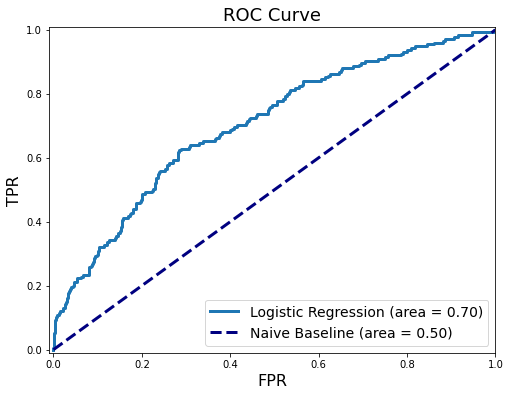

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

ROC curve shows us the trade off between FP (false positive) and FN (false negative). This will allow us to choose the most optimal threshold value by trying to achive a high TPR at low FPR. Since FP (75K) is lower than the FN(700k), therefore, we want a cutoff of when FN is high and FP is low. Although these values are seen together, the data isn't really interacting so it is easy to evaluate what is going on. The area under the curve (AUC) is 0.7. An interesting observation is that the logistic regression line is above the Naive Baseline curve, thus having more TPR (true positive rates). 

# c)

E(cost of prescribing medicine) = E(cost of NOT prescribing medicine)
(C + 500000)(0.15*p) + C(1-(0.15*p)) = 500000*p
C = 425000*p; p = 15/119

In [25]:
C = 425000*15/119
C

53571.42857142857

C should be $53571.42857142857, which is what the insurance company charge as a co-payment for the medication in order that the patients would “self select” in a manner thatis consistent with the previously examined “optimal strategy” discussed in part(a)above. 

# d)

Letting patients choose for themselves is risky behaivor and is an ethical concern. Patients may be driven more by cost than anything legit and sufficient. This could also cause them later health problems due to the risk of the medication. A way to alleviate this problem is for patient and doctor to discuss possible side effects, or they can do some calculations themselves and lower the p-value for low-risk possibilities. 